In [ ]:
from google.colab import drive

import pandas as pd
import sys
import json
import ast


drive.mount('/content/gdrive', force_remount=True)
path_prefix = "/content/gdrive/MyDrive/FoodRec"
sys.path.insert(1, path_prefix)

recipes = pd.read_csv('./gdrive/MyDrive/FoodRec/RAW_recipes.csv')

recipes.head()

Mounted at /content/gdrive


,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [ ]:
features_df = recipes.copy()[['id', 'ingredients']]
# recipes['ingredients'] = recipes['ingredients'].str.replace("'", '"')
# recipes['ingredients'] = recipes['ingredients'].apply(ast.literal_eval)
# recipes["ingredients"] = [", ".join(ingredients) for ingredients in recipes.ingredients]
# features_df = recipes[['id', 'ingredients']]
# features_df["ingredients"] = ["  ".join(ingredients) for ingredients in recipes.ingredients]




In [ ]:
features_df['ingredients'] = features_df['ingredients'].apply(ast.literal_eval)
features_df["ingredients"] = [" ".join(ingredients) for ingredients in features_df.ingredients]
features_df.head()

,id,ingredients
0,137739,winter squash mexican seasoning mixed spice ho...
1,31490,prepared pizza crust sausage patty eggs milk s...
2,112140,ground beef yellow onions diced tomatoes tomat...
3,59389,spreadable cheese with garlic and herbs new po...
4,44061,tomato juice apple cider vinegar sugar salt pe...


In [ ]:
features_df['ingredients'][0]

'winter squash mexican seasoning mixed spice honey butter olive oil salt'

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(features_df.ingredients)

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics

model = KMeans(n_clusters=40, init='k-means++', max_iter=500, n_init=15)
model.fit(X)

KMeans(max_iter=500, n_clusters=40, n_init=15)

In [ ]:
features_df["clusters"] = model.labels_

In [ ]:
features_df.head()

,id,ingredients,clusters
0,137739,winter squash mexican seasoning mixed spice ho...,8
1,31490,prepared pizza crust sausage patty eggs milk s...,8
2,112140,ground beef yellow onions diced tomatoes tomat...,34
3,59389,spreadable cheese with garlic and herbs new po...,21
4,44061,tomato juice apple cider vinegar sugar salt pe...,6


In [ ]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(10):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :15]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:
 cheese
 parmesan
 mozzarella
 pepper
 garlic
 italian
 sauce
 pasta
 salt
 olive
 basil
 fresh
 onion
 butter
 oil
Cluster 1:
 oats
 rolled
 sugar
 quick
 baking
 brown
 flour
 vanilla
 cinnamon
 soda
 butter
 cooking
 wheat
 salt
 raisins
Cluster 2:
 skinless
 boneless
 chicken
 breasts
 breast
 pepper
 halves
 oil
 garlic
 salt
 fresh
 cheese
 olive
 onion
 broth
Cluster 3:
 cinnamon
 sugar
 apples
 brown
 ground
 nutmeg
 butter
 milk
 flour
 water
 vanilla
 apple
 eggs
 pie
 salt
Cluster 4:
 fat
 low
 free
 cheese
 reduced
 milk
 cream
 pepper
 salt
 sour
 cheddar
 chicken
 onion
 egg
 fresh
Cluster 5:
 mix
 cake
 pudding
 instant
 chocolate
 vanilla
 eggs
 sugar
 cool
 whip
 milk
 yellow
 cream
 water
 butter
Cluster 6:
 vinegar
 mustard
 red
 pepper
 salt
 cider
 oil
 wine
 balsamic
 sugar
 olive
 white
 onion
 dijon
 garlic
Cluster 7:
 sauce
 worcestershire
 pepper
 mustard
 ketchup
 onion
 salt
 garlic
 vinegar
 ground
 brown
 beef
 powder
 hot

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Text(0, 0.5, 'SSE')

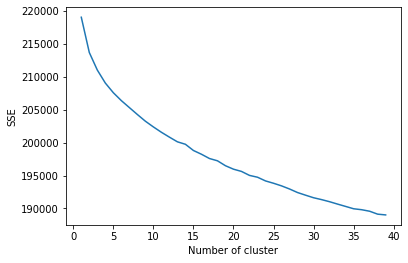

In [ ]:
import matplotlib.pyplot as plt
# Continuing after vectorization step
# data-structure to store Sum-Of-Square-Errors
sse = {}
# Looping over multiple values of k from 1 to 30
for k in range(1, 40):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=100).fit(X)
    features_df["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_
# Plotting the curve with 'k'-value vs SSE
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()